In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-original-films-imdb-scores/NetflixOriginals.csv


In [50]:
data = pd.read_csv("/kaggle/input/netflix-original-films-imdb-scores/NetflixOriginals.csv")

In [51]:
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [53]:
data['Premiere'].unique()

array(['August 5, 2019', 'August 21, 2020', 'December 26, 2019',
       'January 19, 2018', 'October 30, 2020', 'November 1, 2019',
       'December 4, 2020', 'June 5, 2020', 'March 23, 2018',
       'May 18, 2021', 'April 22, 2021', 'November 27, 2020',
       'September 18, 2020', 'October 1, 2020', 'November 22, 2016',
       'December 19, 2019', 'January 1, 2020', 'February 21, 2020',
       'January 1, 2021', 'August 25, 2017', 'September 13, 2019',
       'July 18, 2019', 'August 16, 2019', 'February 26, 2021',
       'April 9, 2021', 'July 16, 2020', 'April 2, 2021', 'July 31, 2020',
       'February 10, 2021', 'December 7, 2018', 'May 24, 2019',
       'October 28, 2016', 'February 22, 2019', 'December 3, 2019',
       'October 25, 2019', 'July 15, 2020', 'July 14, 2020',
       'November 30, 2020', 'January 18, 2019', 'March 5, 2021',
       'April 2, 2020', 'October 2, 2020', 'December 25, 2020',
       'January 6, 2017', 'May 1, 2020', 'October 28, 2020',
       'January 20,

In [54]:
data.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

In [55]:
cat = ['Title', 'Genre', 'Language']

In [56]:
num = ['Runtime']

In [57]:
y = data['IMDB Score']

In [58]:
del data['IMDB Score']

In [59]:
cat_data= pd.get_dummies(data[cat], drop_first=True)

In [60]:
df = pd.concat([cat_data, data[num]], axis=1)

In [61]:
df.shape

(584, 735)

In [62]:
x = df.copy()

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [64]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sc,y, test_size=0.2, random_state=0)

In [65]:
y_train.shape

(467,)

In [66]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 100, random_state = 0)
RF.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [67]:
y_pred = RF.predict(x_test)

In [68]:
RF.score(x_test, y_test)

0.21979399981184378

In [69]:
RF.score(x_train, y_train)

0.8941600427930085

In [70]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [71]:
RF = RandomForestRegressor()
RF_Random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
RF_Random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [72]:
RF_Random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [73]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [74]:
best_model = RandomForestRegressor(n_estimators = 1600, random_state = 42)
best_model.fit(x_train, y_train)
best_accuracy = evaluate(best_model, x_test, y_test)

Model Performance
Average Error: 0.6376 degrees.
Accuracy = 88.39%.


In [75]:
y_pred = best_model.predict(x_test)

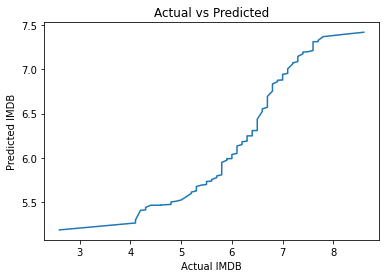

In [83]:
import matplotlib.pyplot as plt
plt.plot(pd.Series(y_test).sort_values(ascending=True),pd.Series(y_pred).sort_values(ascending=True))
plt.title("Actual vs Predicted")
plt.xlabel("Actual IMDB")
plt.ylabel("Predicted IMDB")
plt.show()